In [7]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA

df_loaded = pd.read_csv('insurance_data_cleaned.csv')

In [8]:

X_loaded = df_loaded.drop('charges_scaled', axis=1)

y_loaded = df_loaded['charges_scaled'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X_loaded, 
    y_loaded, 
    test_size=0.20, 
    random_state=42 
)

#  Load the Scaler

scaler_y = joblib.load('scaler_y.pkl') 



In [22]:
n_features = X_train.shape[1]
print(n_features)

best_r2_pca = -np.inf
best_k_pca = None
best_components = None
best_model = None
best_pca = None

for n_comp in range(1, n_features + 1):

    pca = PCA(n_components=n_comp)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    for k_try in range(1, 10): 
        model = KNeighborsRegressor(n_neighbors=k_try)
        model.fit(X_train_pca, y_train)

        y_pred_try = model.predict(X_test_pca)
        r2_try = r2_score(y_test, y_pred_try)

        if r2_try > best_r2_pca:
            best_r2_pca = r2_try
            best_k_pca = k_try
            best_components = n_comp
            best_model = model
            best_pca = pca
print(f"Best PCA Components = {best_components}, Best k = {best_k_pca}, Best R² = {best_r2_pca:.4f}, {model}")

8
Best PCA Components = 7, Best k = 7, Best R² = 0.7710, KNeighborsRegressor(n_neighbors=9)


In [21]:
X_train_pca = best_pca.transform(X_train)
X_test_pca = best_pca.transform(X_test)

y_pred = best_model.predict(X_test_pca)

In [11]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"KNN + PCA Results (k={best_k_pca}, components={best_components}):")
print(f"MAE = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")


KNN + PCA Results (k=7, components=7):
MAE = 0.3283
RMSE = 0.4937


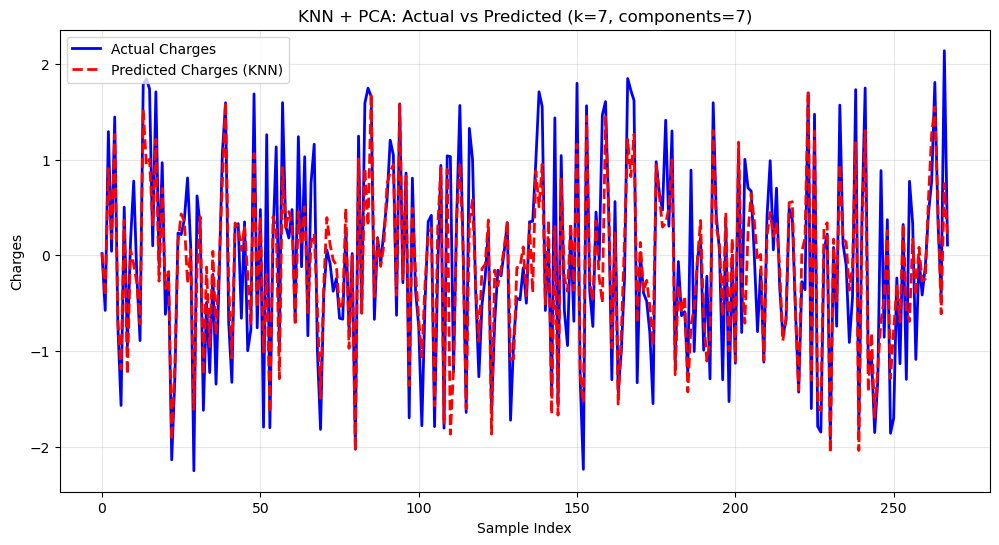

In [12]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual Charges', color='blue', linewidth=2)
plt.plot(y_pred, label='Predicted Charges (KNN)', color='red', linewidth=2, linestyle='--')
plt.title(f'KNN + PCA: Actual vs Predicted (k={best_k_pca}, components={best_components})')
plt.xlabel('Sample Index')
plt.ylabel('Charges')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [13]:
r2 = r2_score(y_test, y_pred)
print(f"R² score = {r2:.4f}")


R² score = 0.7710
